In [1]:
import torch
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

начнем с разминки и напишем кастомный датасет

In [10]:
from torchvision.datasets import VisionDataset
from torchvision.transforms import ToTensor, Resize, Compose
from torch.utils.data import DataLoader
import os 
from torchvision.datasets.folder import make_dataset,default_loader

class DogsAndCats(VisionDataset):
    def __init__(self, root, transforms = None, transform = None, target_transform = None):
        super().__init__(root=root, transforms = transforms,transform=transform, target_transform=target_transform)
        iter = os.walk(self.root)
        self.dir = next(iter)
        self.classes = dict([(self.dir[1][i],i) for i in range(len(self.dir[1]))])
        self.samples = make_dataset(self.root, self.classes, extensions='jpg')
        self.len = 0
        
    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        if idx > self.__len__():
            raise IndexError
        img = default_loader(self.samples[idx][0])
        #print(img)
        label = self.samples[idx][1]
        if self.transform is not None:
            img = self.transform(img)
        if self.target_transform is not None:
            label = self.target_transform(label) 
        return img ,label 
        
        



[('./customData/DogsCats\\Cat\\1.jpg', 0), ('./customData/DogsCats\\Cat\\2.jpg', 0), ('./customData/DogsCats\\Cat\\3.jpg', 0), ('./customData/DogsCats\\Dog\\1.jpg', 1), ('./customData/DogsCats\\Dog\\2.jpg', 1), ('./customData/DogsCats\\Dog\\3.jpg', 1)]


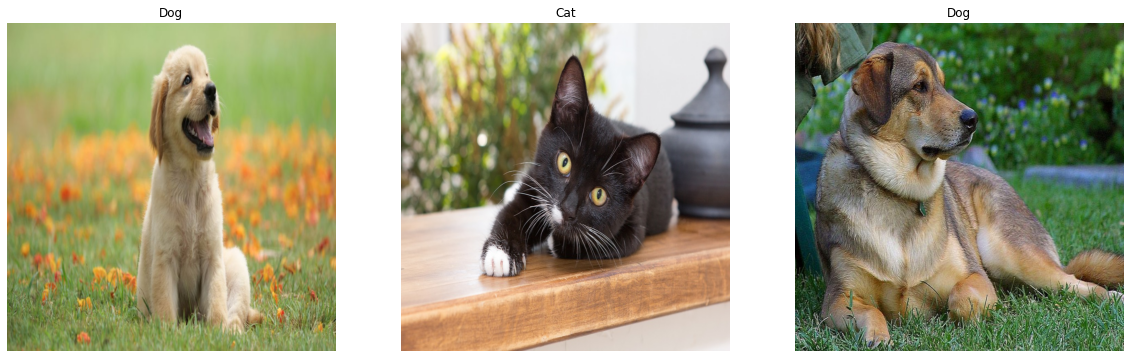

In [12]:
dataset = DogsAndCats(root="./customData/DogsCats",
    transform=Compose([
        Resize((640,640)),
        ToTensor()
    ])
)
print(dataset.samples)
f = plt.figure(figsize=(20,20))

amount = 3
for i in range(1,amount + 1):
    idx = torch.randint(len(dataset),size=(1,)).item()
    img, label = dataset[idx]
    f.add_subplot(1, amount, i)
    plt.title(list(dataset.classes.keys())[label])
    plt.axis("off")
    plt.imshow(img.permute(1,2,0))


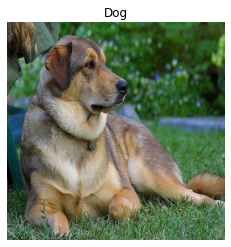

In [14]:
dl = DataLoader(dataset, batch_size=1, shuffle = True)
img, label = next(iter(dl))
plt.title(list(dataset.classes.keys())[label[0]])
plt.axis("off")
plt.imshow(img[0].permute(1,2,0))

In [15]:
from torchvision.utils import make_grid
def show_dataset(dataset, n=6):
    imgs = torch.stack([dataset[i][0] for _ in range(n)
                       for i in range(len(dataset))])
    grid = make_grid(imgs).numpy()
    plt.imshow(np.transpose(grid, (1, 2, 0)), interpolation='nearest')
    plt.axis('off')

C:\Users\vvpvo\AppData\Local\Temp\ipykernel_15596\2397654607.py:8: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  T.RandomRotation(20, resample=PIL.Image.BILINEAR),


torch.Size([3, 640, 640])


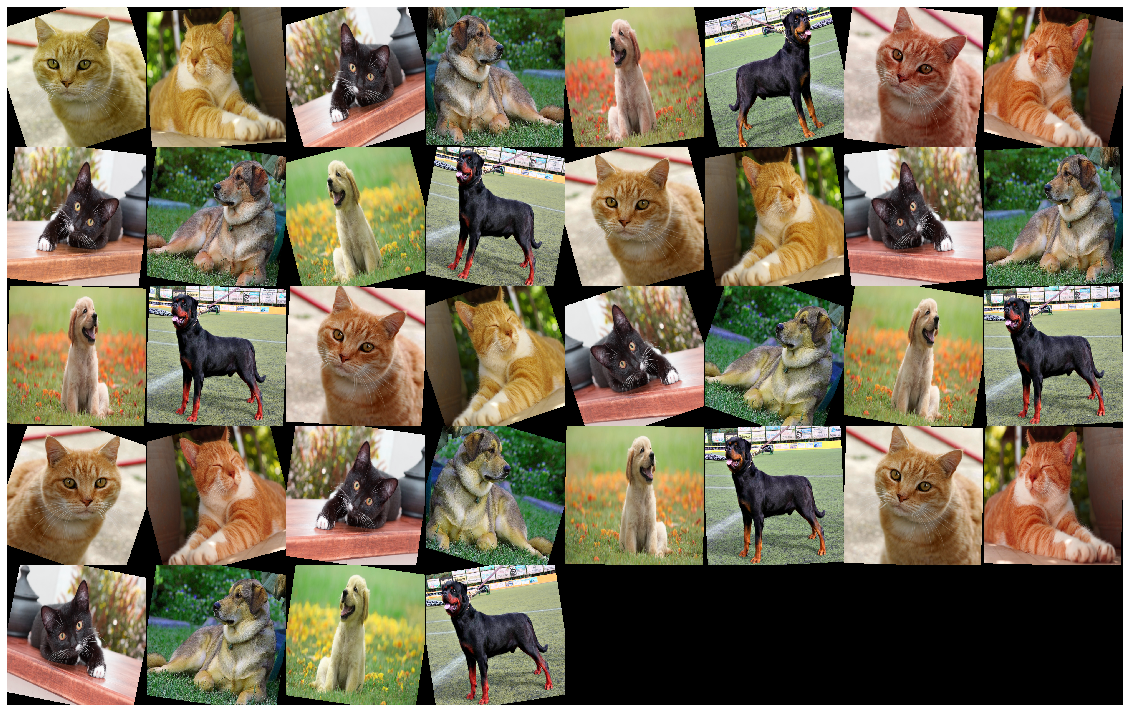

In [48]:
import torchvision.transforms as T
import PIL
dataset = DogsAndCats(root="./customData/DogsCats",
    transform = T.Compose([
        T.Resize((640,640)),      
        T.ColorJitter(hue=.05, saturation=.05),
        T.RandomHorizontalFlip(),
        T.RandomRotation(20, resample=PIL.Image.BILINEAR),
        T.ToTensor()
    ])
)
f = plt.figure(figsize=(20,20))
f.add_subplot(111)
show_dataset(dataset)
print(dataset[0][0].shape)


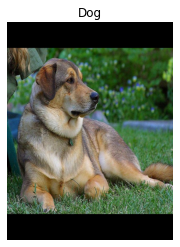

In [32]:
dl = DataLoader(dataset, batch_size=1, shuffle = True)
img, label = next(iter(dl))
plt.title(list(dataset.classes.keys())[label[0]])
plt.axis("off")
plt.imshow(img[0].permute(1,2,0))